# APSC-5984 Week 12: Data Visualization

Data visualization is an essentail skill to demonstrate the results of your analysis. A good visualization can help your audience understand your research question and key findings. In this note, we will work with three Python libraries of data visualization:

- Matplotlib: a native Python library for data visualization
- Plotly: a Python library for interactive data visualization and web-based applications.



## Matplotlib

Matplotlib is a Python library for data visualization. We will use this library to introduce the basic concepts of data visualization. The basic components of a plot are described in the figure below:

<center><img src="figures/plot_components.webp" width="600"></center>

- Title: the title of the plot
- Legend: a list of labels for each data series (variable)
- Major and minor ticks: visible marks of the axis. Major ticks are usually labeled, while minor ticks are not but still visible as small lines.
- Spines: the four lines that connect the ticks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Scatter Plot

https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.axes.Axes.scatter.html

A simple figure that describes the relationship between two variables is a scatter plot. We can use the `scatter()` function to create a line plot. The `scatter()` function takes two arguments: the x-axis variable and the y-axis variable.

In [3]:
# define x and y
x = [1, 3, 6, 8]
y = [2, 4, 3, 7]

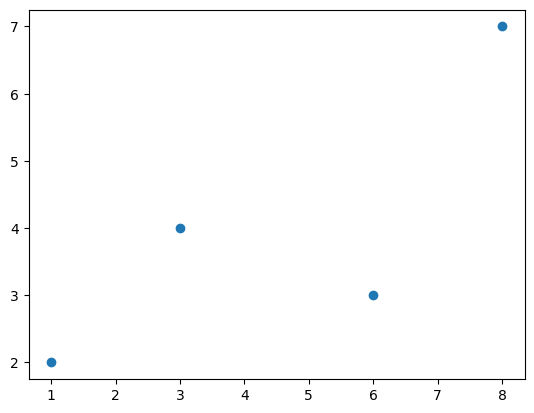

In [4]:
plt.scatter(x, y)

There are couple of optional arguments that we commonly use to customize the plot:

- `s`: the size of the marker
- `c`: the color of the marker
- `alpha`: the transparency of the marker
- `marker`: the shape of the marker (https://matplotlib.org/3.5.3/api/markers_api.html#module-matplotlib.markers)
- `edgecolors`: the color of the marker's edge
- `linewidths`: the width of the marker's edge

For example, we can modify the scatter plot above as follows:

- set the marker size to 300
- set the marker color to red
- set the marker shape to a star
- set the marker edge color to blue
- set the marker edge width to 2

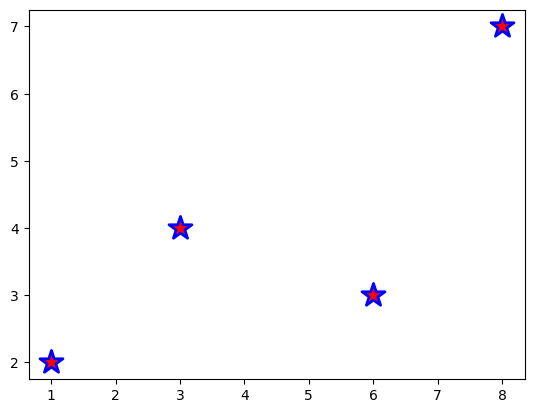

In [5]:
plt.scatter(x, y,
            s=300, c='red', marker='*', edgecolor='blue', linewidth=2)

Equivalently, we can use a dictionary to store the parameters, which is more convenient when we have many parameters to set:

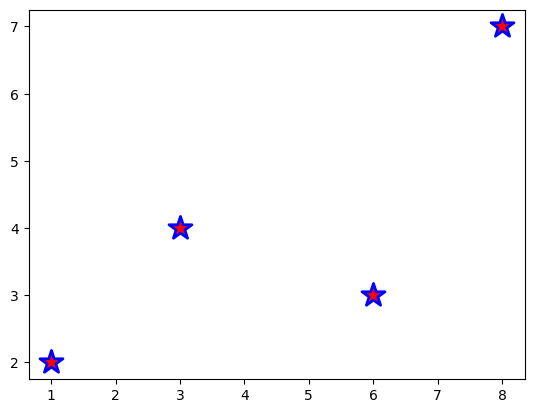

In [6]:
param = {
    "s": 300,
    "c": "red",
    "marker": "*",
    "edgecolor": "blue",
    "linewidth": 2
}
plt.scatter(x, y, **param)

### Figure

https://matplotlib.org/3.5.3/api/figure_api.html

In addtion to modify the data points, we can also explicitly set the details of the figure and axes. The `figure()` function creates a figure object, which is the container of the plot. The available arguments are:

- `figsize`: the size of the figure. It takes a tuple of two numbers, which are the width and the height in inches.
- `dpi`: the resolution of the figure. It is recommended to set the resolution to 300 for publication.
- `facecolor`: the background color of the figure.
- `edgecolor`: the edge color of the figure.
- `linewidth`: the edge width of the figure.

Here is an example to make the figure even more ugly:

- a width of 10 inches and a height of 5 inches
- dpi of 300
- facecolor of yellow, edgecolor of blue, and linewidth of 5

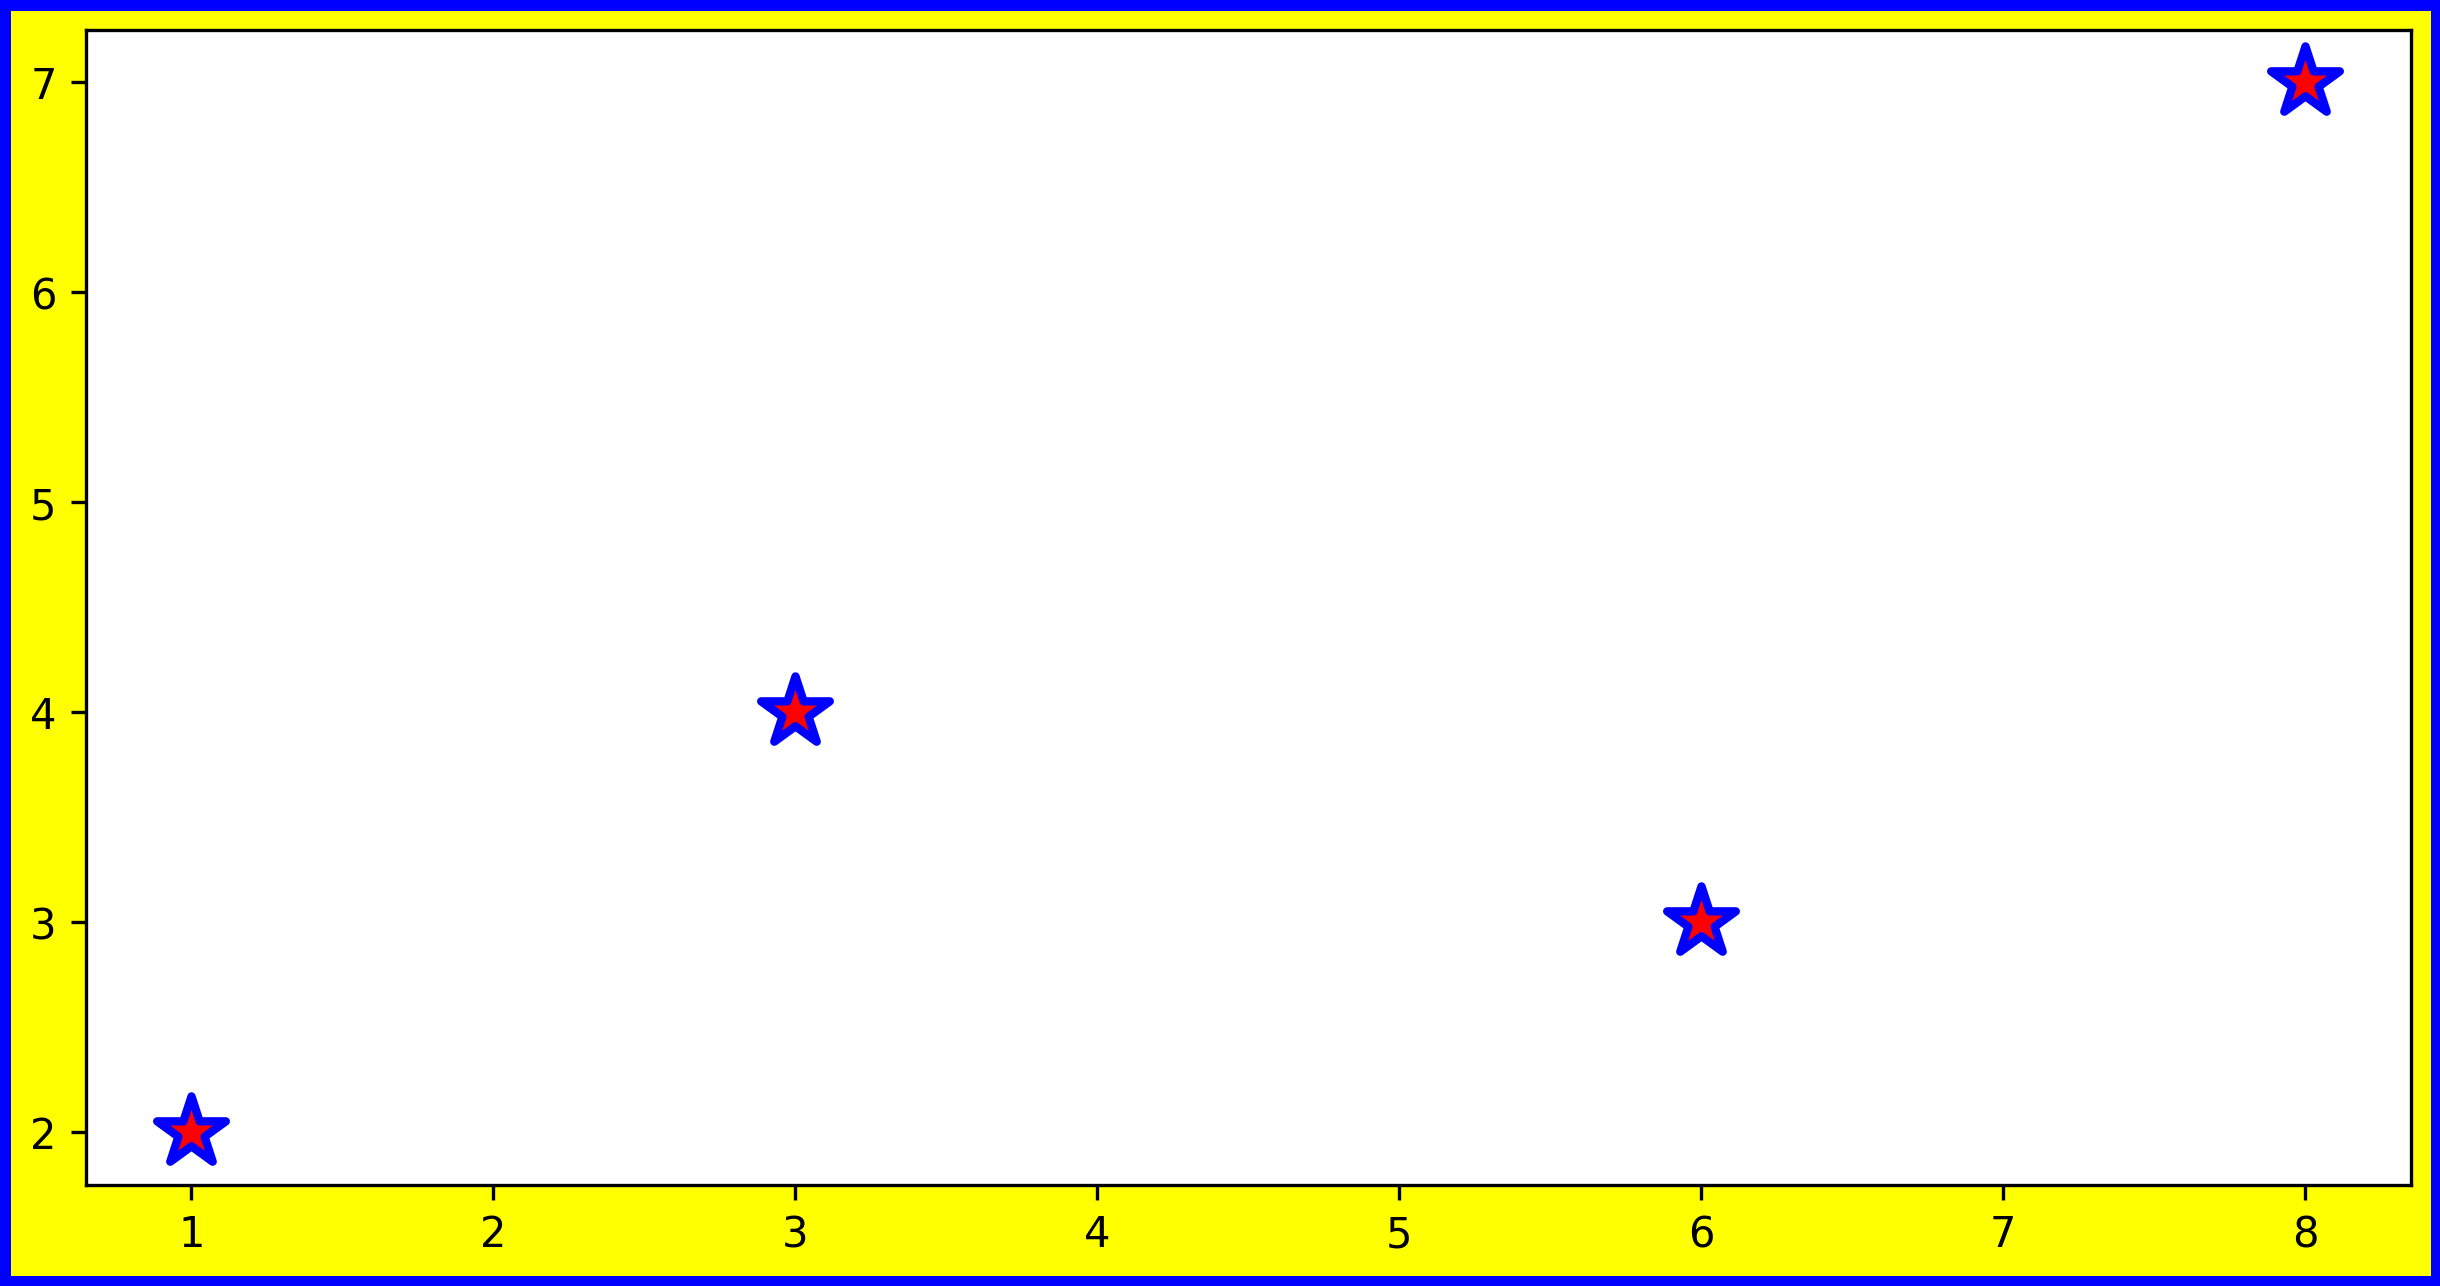

In [7]:
param_fig = {
    "figsize": (10, 5),
    "dpi": 300,
    "facecolor": "yellow",
    "edgecolor": "blue",
    "linewidth": 5
}
param_data = {
    "s": 300,
    "c": "red",
    "marker": "*",
    "edgecolor": "blue",
    "linewidth": 2
}
plt.figure(**param_fig)
plt.scatter(x, y, **param_data)

### Axes

Axes are another important component of a plot. In some cases, we may only want to show a part of the data or highlight a specific range of a variable. Available arguments of the `axes()` function are:

- `xlim`: the range of the x-axis. It takes a tuple of two numbers, which are the minimum and the maximum of the x-axis.
- `xticks`: the major ticks of the x-axis. It takes a list of numbers, which are the positions of the major ticks. You can also modify the minor ticks by setting an additional argument `minor=True`.
- `xlabel`: the label of the x-axis.

Are you able to explain the following code/plot?

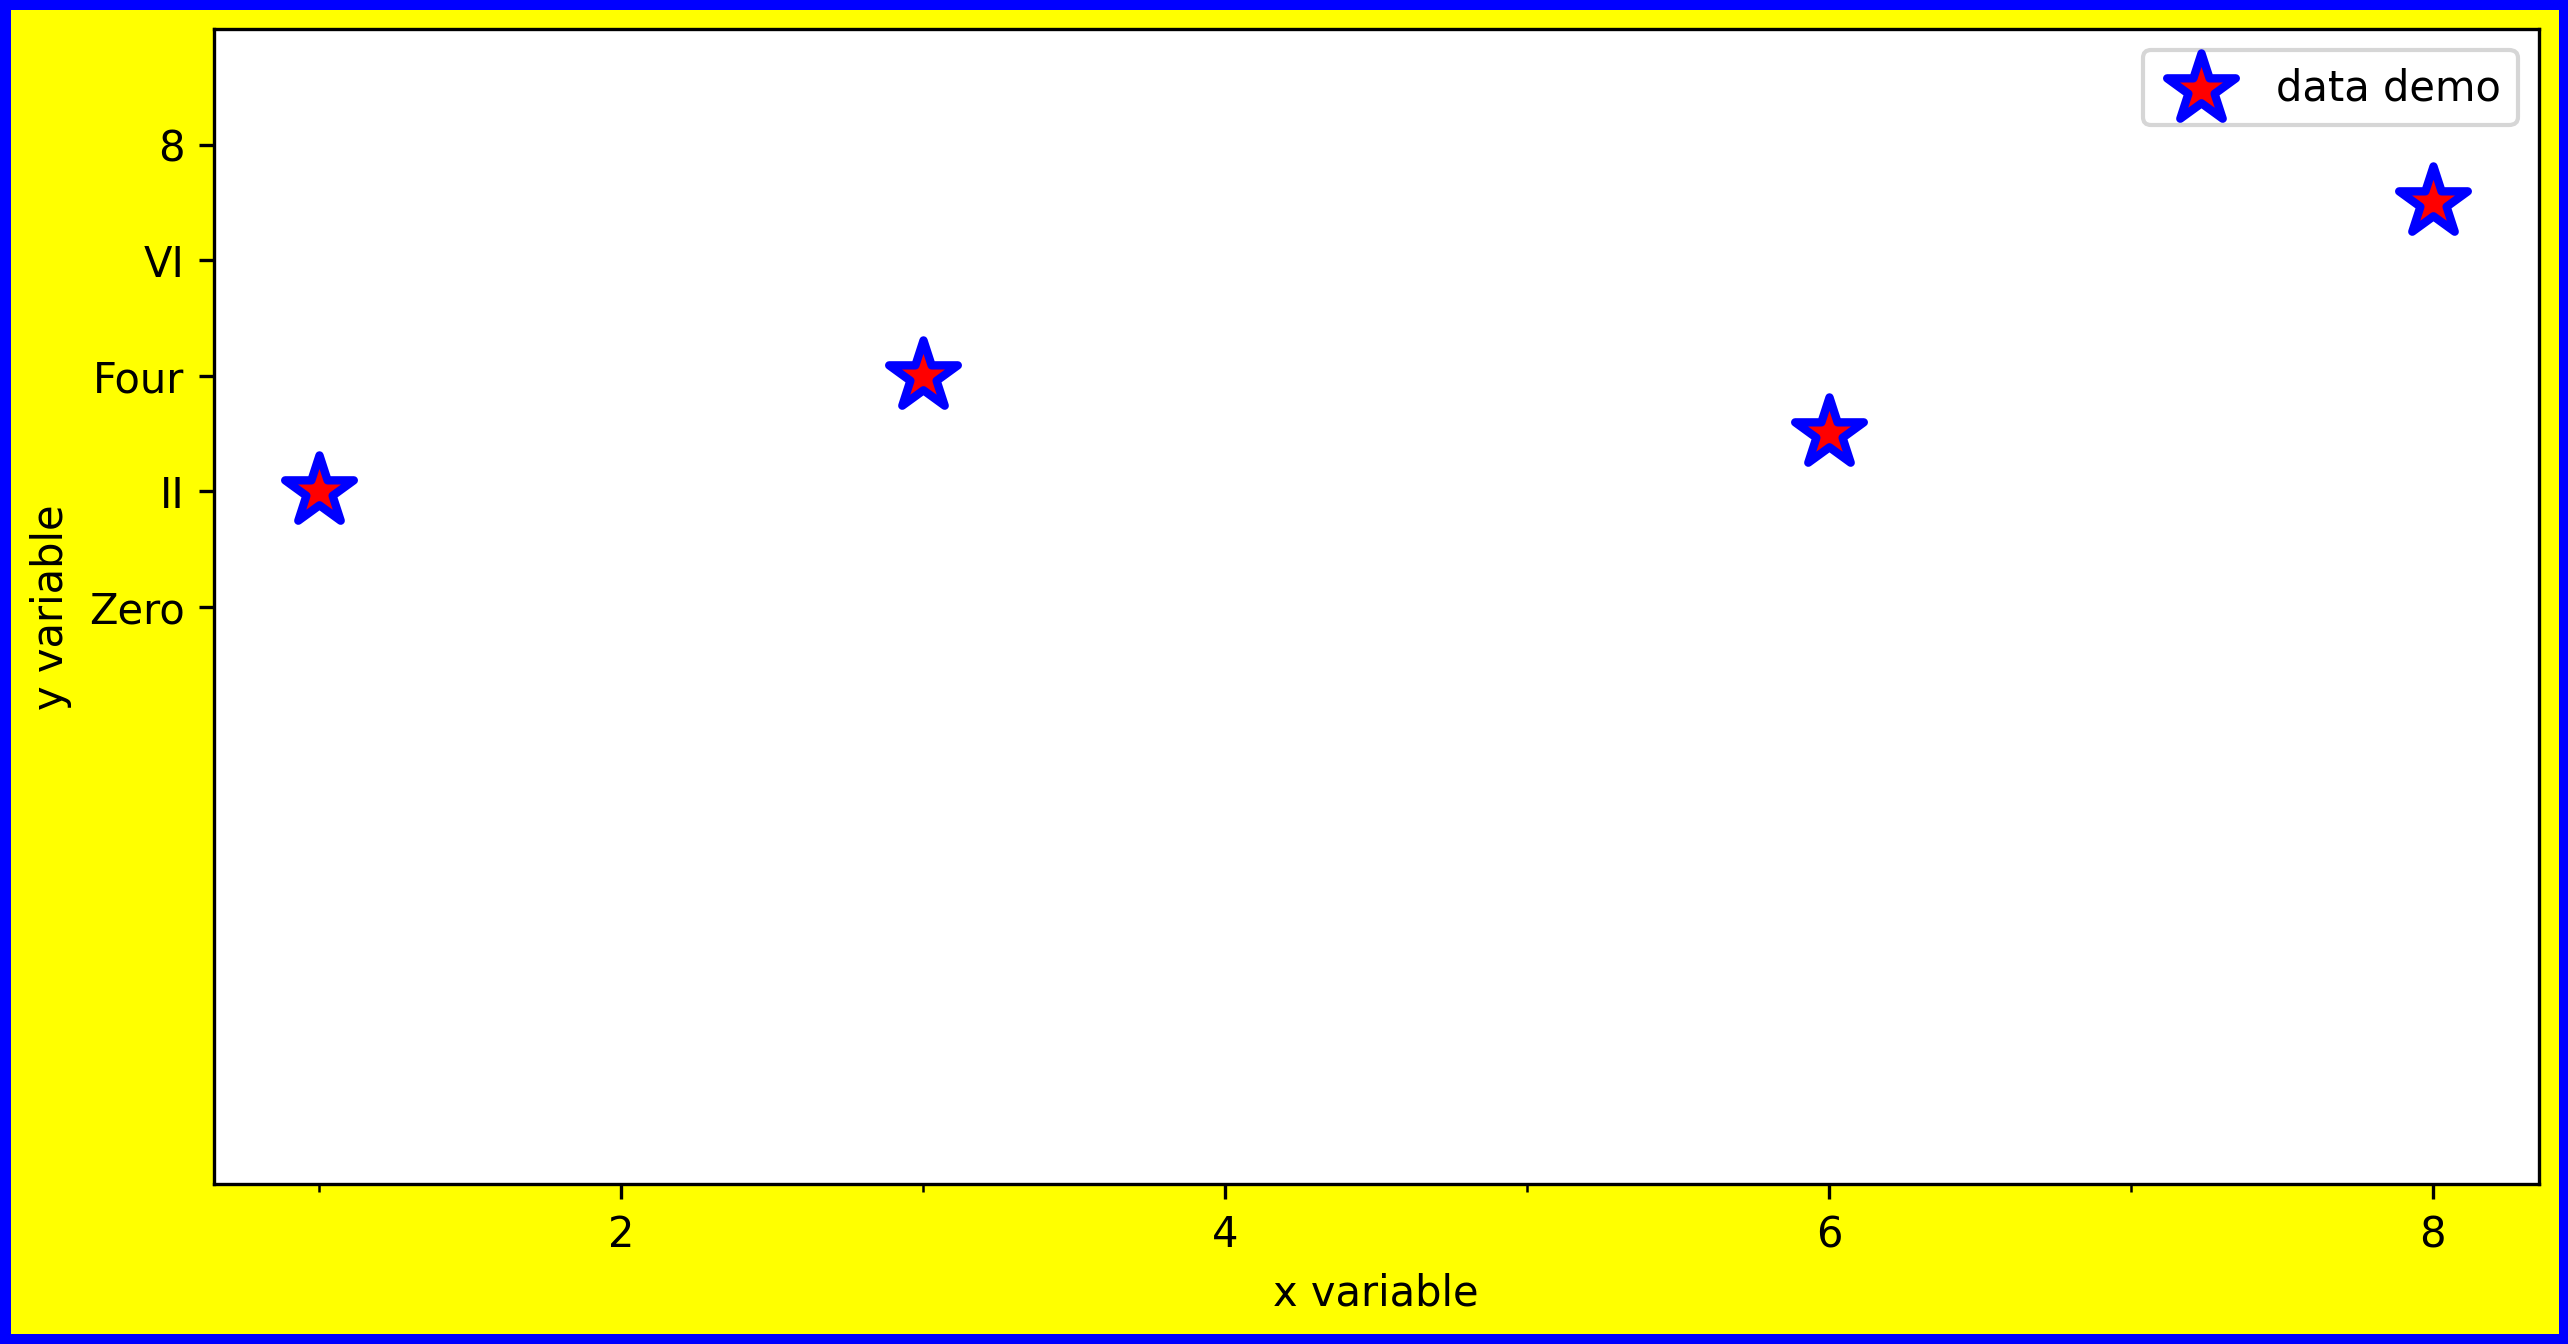

In [8]:
param_fig = {
    "figsize": (10, 5),
    "dpi": 300,
    "facecolor": "yellow",
    "edgecolor": "blue",
    "linewidth": 5
}
param_data = {
    "s": 300,
    "c": "red",
    "marker": "*",
    "edgecolor": "blue",
    "linewidth": 2
}

# figure
plt.figure(**param_fig)
# x axis
plt.xticks(np.arange(0, 10, 2)) # major ticks (0, 2, 4, 6, 8)
plt.xticks(np.arange(0, 10, 1), minor=True) # minor ticks (0, 1, 2,..., 9)
plt.xlabel("x variable")
# y axis
plt.yticks(np.arange(0, 10, 2), labels=["Zero", "II", "Four", "VI", "8"])
plt.ylabel("y variable")
plt.ylim(-10, 10)
# data
plt.scatter(x, y, **param_data, label="data demo") # add label for the legend
plt.legend() # legend must be added AFTER the data

### Tidy Dataset

We can use the tidy dataset to practice the data visualization skills and ask research questions from the data.

In [9]:
data = pd.read_csv("data/tidy_X.csv")
data

,sex,age,yod,mod,dod,hod,cod
0,1,90,2008,1,7,20,F17
1,1,72,2008,1,13,14,I05
2,1,49,2008,1,12,20,K65
3,2,79,2008,1,20,10,I38
4,1,15,2008,1,1,15,N18
...,...,...,...,...,...,...,...
528323,1,1,2008,10,6,12,P22
528324,2,20,2008,10,18,20,Q24
528325,2,3,2008,11,11,19,P22
528326,1,24,2008,9,25,12,P22


#### Data wrangling

We want to know the relationship between the death rate and other variables: sex, age, and hod. We use `groupby()` to aggregate the data by the three variables and calculate the death rate for each group.

In [10]:
data_ct = data.\
    groupby(["sex", "age", "hod"]).\
        agg(count=("hod", "count")).\
            reset_index()
data_ct

,sex,age,hod,count
0,1,1,0,171
1,1,1,1,152
2,1,1,2,185
3,1,1,3,190
4,1,1,4,197
...,...,...,...,...
4747,2,99,19,40
4748,2,99,20,40
4749,2,99,21,38
4750,2,99,22,35


And we need to calculate the sum of the number of deaths in each gender group.

In [11]:
data_ct = data_ct.\
    groupby("sex").\
        agg(sum=("count", "sum")).\
            reset_index().\
                merge(data_ct)
data_ct["rate"] = data_ct["count"] / data_ct["sum"]
data_ct["per_mille"] = data_ct["rate"] * 1000
data_ct

,sex,sum,age,hod,count,rate,per_mille
0,1,294035,1,0,171,0.000582,0.581563
1,1,294035,1,1,152,0.000517,0.516945
2,1,294035,1,2,185,0.000629,0.629177
3,1,294035,1,3,190,0.000646,0.646182
4,1,294035,1,4,197,0.000670,0.669988
...,...,...,...,...,...,...,...
4747,2,234293,99,19,40,0.000171,0.170726
4748,2,234293,99,20,40,0.000171,0.170726
4749,2,234293,99,21,38,0.000162,0.162190
4750,2,234293,99,22,35,0.000149,0.149386


#### Age and Death Rate by Gender

We can generate a scatter plot to visualize the research question of whether there is an association between gender and death rate based on age.

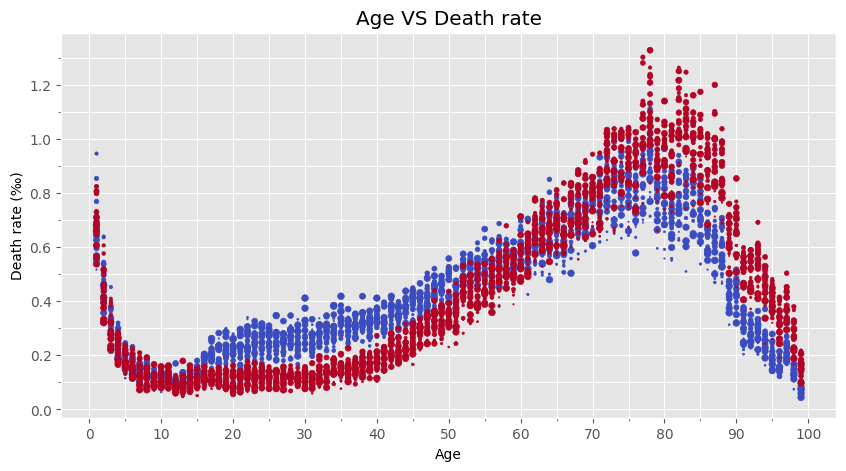

In [12]:
# figure
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.grid(True, which="both")
plt.title("Age VS Death rate")
# axis
plt.xlabel("Age")
plt.xticks(np.arange(0, 110, 10))
plt.xticks(np.arange(0, 110, 5), minor=True)
plt.ylabel("Death rate (‰)")
plt.yticks(np.arange(0, 1.6, 0.1), minor=True)
# data
plt.scatter("age", "per_mille", s="hod", c="sex", data=data_ct, cmap="coolwarm")

#### Age and Death Rate by Gender by Hour of the Day

In the figure above, we have introduced four variables to the figures: `sex`, `age`, `death`, and `hod`. Can we further breakdown the death rate by the hour of the day? We can categorize the hour of the day into four groups:
- 5 am to 11 am
- 11 am to 5 pm
- 5 pm to 11 pm
- 11 pm to 5 am

In [13]:
def cat_hod(x):
    if x >= 5 and x < 11:
        return "5 am - 11 am"
    elif x >= 11 and x < 17:
        return "11 am - 5 pm"
    elif x >= 17 and x < 23:
        return "5 pm - 11 pm"
    else:
        return "11 pm - 5 am"
data_ct["hod_cat"] = data_ct["hod"].apply(cat_hod)
data_ct

,sex,sum,age,hod,count,rate,per_mille,hod_cat
0,1,294035,1,0,171,0.000582,0.581563,11 pm - 5 am
1,1,294035,1,1,152,0.000517,0.516945,11 pm - 5 am
2,1,294035,1,2,185,0.000629,0.629177,11 pm - 5 am
3,1,294035,1,3,190,0.000646,0.646182,11 pm - 5 am
4,1,294035,1,4,197,0.000670,0.669988,11 pm - 5 am
...,...,...,...,...,...,...,...,...
4747,2,234293,99,19,40,0.000171,0.170726,5 pm - 11 pm
4748,2,234293,99,20,40,0.000171,0.170726,5 pm - 11 pm
4749,2,234293,99,21,38,0.000162,0.162190,5 pm - 11 pm
4750,2,234293,99,22,35,0.000149,0.149386,5 pm - 11 pm


To decompose the death rate by the hour of the day, we need create four subplots for each `hod_cat` group. We can use the `subplots()` function to explicitly define each subplot.

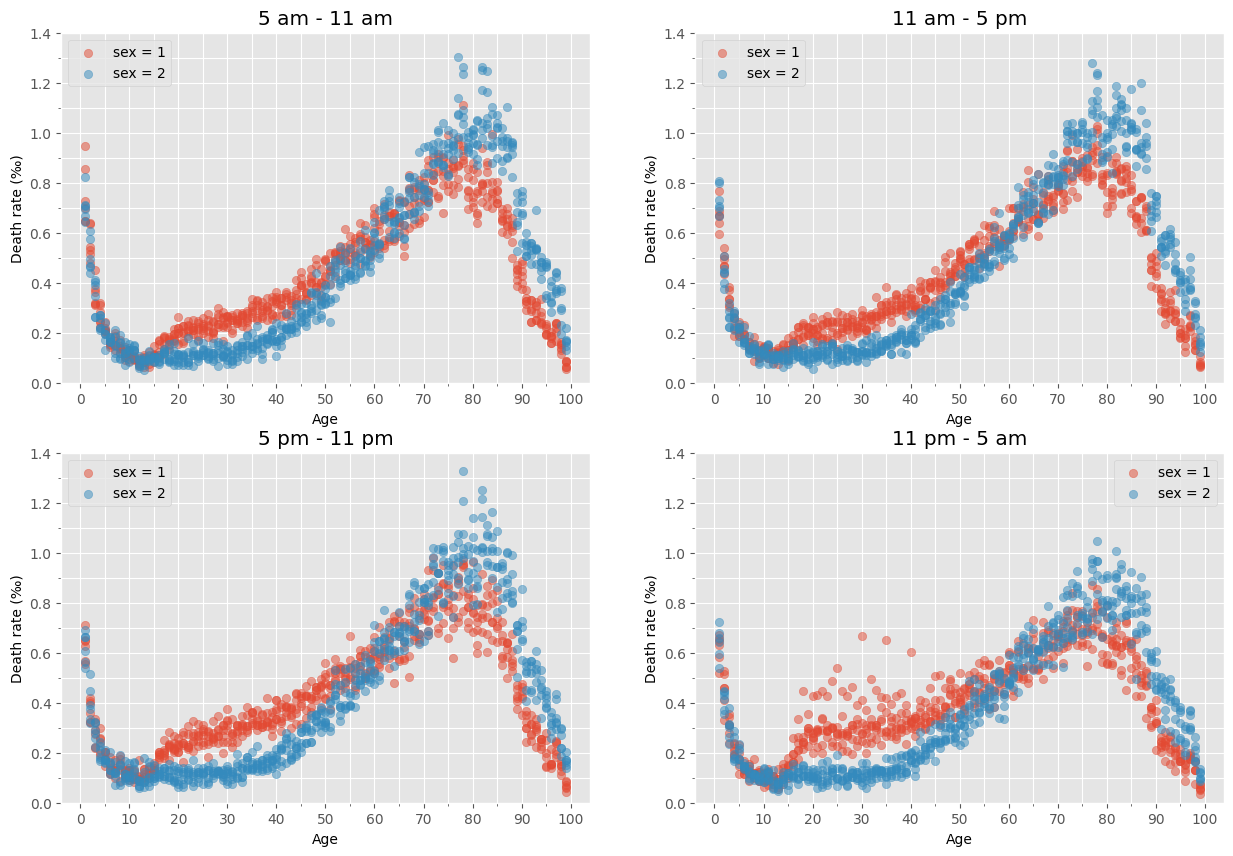

In [15]:
figure, axes = plt.subplots(2, 2, figsize=(15, 10)) # same available parameters as plt.figure()
axes = axes.flatten() # from 2D array to 1D array
for i, hod_cat in enumerate(["5 am - 11 am", "11 am - 5 pm", "5 pm - 11 pm", "11 pm - 5 am"]):
    ax = axes[i]
    # subplot config
    ax.set_title(hod_cat)
    ax.grid(True, which="both")
    # axis
    ax.set_xlabel("Age")
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_xticks(np.arange(0, 110, 5), minor=True)
    ax.set_ylabel("Death rate (‰)")
    ax.set_yticks(np.arange(0, 1.6, 0.1), minor=True)
    ax.set_ylim(0, 1.4)
    # data
    data_sub = data_ct.query("hod_cat == @hod_cat")
    for s in [1, 2]:
        data_sub_s = data_sub.query("sex == @s")
        ax.scatter("age", "per_mille", alpha=.5,
                   data=data_sub_s, label="sex = " + str(s))
    ax.legend()

### Histogram
Scatter plots are commonly used to visualize the relationship between two variables. However, in some cases, we may be interested in visualizing the distribution of a single variable. For example, we demonstrated above how to show the distribution of the death rate over different age groups. In this case, a histogram or a density plot may be more appropriate than a scatter plot.

Let's re-load the data and only do the categorization of the hour of the day.

In [16]:
# density plot
data = pd.read_csv("data/tidy_X.csv")
data["hod_cat"] = data["hod"].apply(cat_hod)
data

,sex,age,yod,mod,dod,hod,cod,hod_cat
0,1,90,2008,1,7,20,F17,5 pm - 11 pm
1,1,72,2008,1,13,14,I05,11 am - 5 pm
2,1,49,2008,1,12,20,K65,5 pm - 11 pm
3,2,79,2008,1,20,10,I38,5 am - 11 am
4,1,15,2008,1,1,15,N18,11 am - 5 pm
...,...,...,...,...,...,...,...,...
528323,1,1,2008,10,6,12,P22,11 am - 5 pm
528324,2,20,2008,10,18,20,Q24,5 pm - 11 pm
528325,2,3,2008,11,11,19,P22,5 pm - 11 pm
528326,1,24,2008,9,25,12,P22,11 am - 5 pm


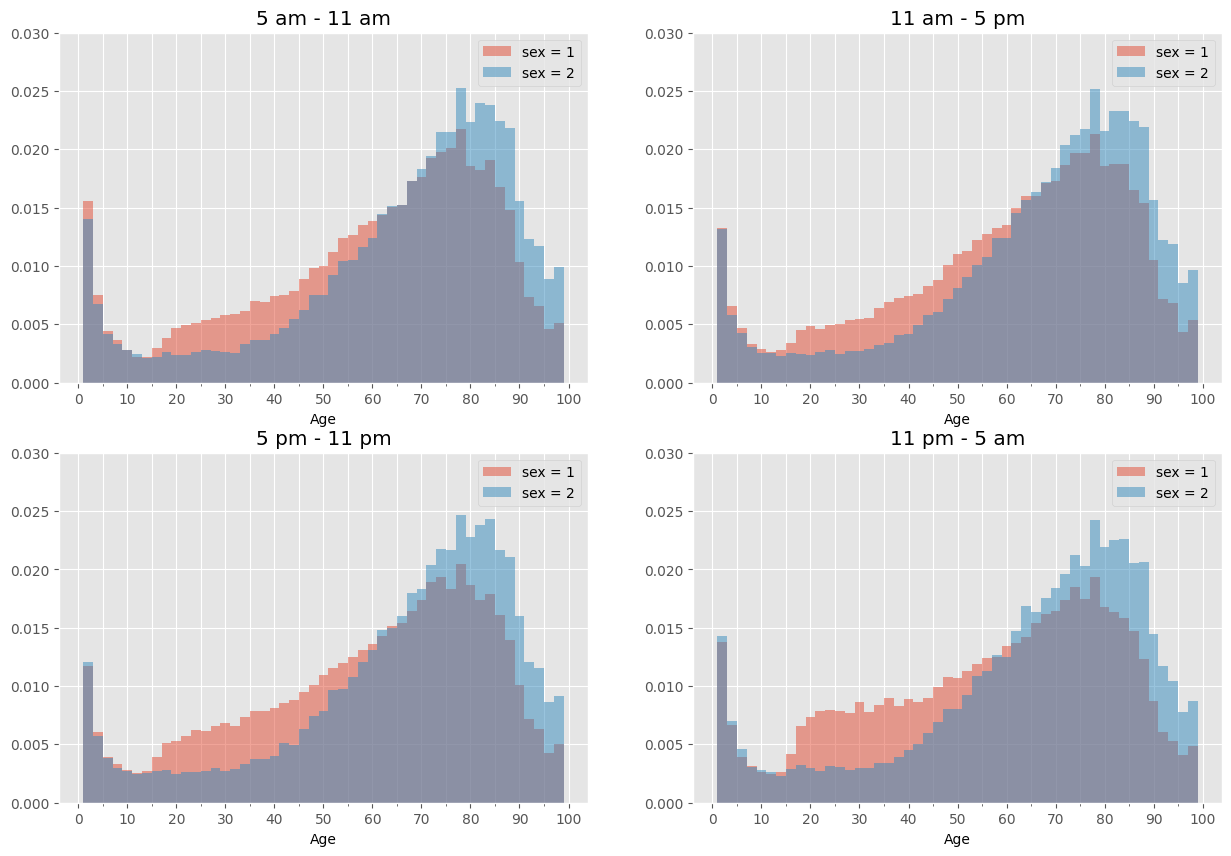

In [17]:
figure, axes = plt.subplots(2, 2, figsize=(15, 10)) # same available parameters as plt.figure()
axes = axes.flatten() # from 2D array to 1D array
for i, hod_cat in enumerate(["5 am - 11 am", "11 am - 5 pm", "5 pm - 11 pm", "11 pm - 5 am"]):
    ax = axes[i]
    # subplot config
    ax.set_title(hod_cat)
    ax.grid(True, which="both")
    # axis
    ax.set_xlabel("Age")
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_xticks(np.arange(0, 110, 5), minor=True)
    ax.set_ylim(0, 0.03)
    # data
    data_sub = data.query("hod_cat == @hod_cat")
    for s in [1, 2]:
        data_sub_s = data_sub.query("sex == @s")
        ax.hist("age", data=data_sub_s, label="sex = " + str(s),
                bins=49, alpha=.5, density=True)
    ax.legend()

### Boxplot

What if we want to compare the distribution of the death rate (y-axis) across different hours of the day (x-axis)? Let's first try the scatter plot and a histogram.

Scatter plot

In [18]:
data_ct

,sex,sum,age,hod,count,rate,per_mille,hod_cat
0,1,294035,1,0,171,0.000582,0.581563,11 pm - 5 am
1,1,294035,1,1,152,0.000517,0.516945,11 pm - 5 am
2,1,294035,1,2,185,0.000629,0.629177,11 pm - 5 am
3,1,294035,1,3,190,0.000646,0.646182,11 pm - 5 am
4,1,294035,1,4,197,0.000670,0.669988,11 pm - 5 am
...,...,...,...,...,...,...,...,...
4747,2,234293,99,19,40,0.000171,0.170726,5 pm - 11 pm
4748,2,234293,99,20,40,0.000171,0.170726,5 pm - 11 pm
4749,2,234293,99,21,38,0.000162,0.162190,5 pm - 11 pm
4750,2,234293,99,22,35,0.000149,0.149386,5 pm - 11 pm


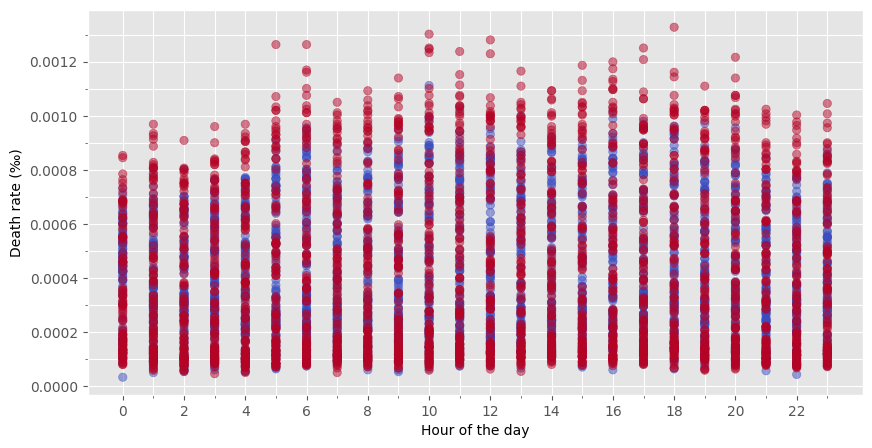

In [19]:
# figure
plt.figure(figsize=(10, 5))
plt.grid(True, which="both")
# axis
plt.xlabel("Hour of the day")
plt.xticks(np.arange(0, 24, 2))
plt.xticks(np.arange(0, 24, 1), minor=True)
plt.ylabel("Death rate (‰)")
plt.yticks(np.arange(0, 0.0014, 0.0001), minor=True)
# data
plt.scatter("hod", "rate", c="sex", cmap="coolwarm", alpha=.5, data=data_ct)

In this case, a scatter plot is not the optimal choice because the data points may overlap, obscuring the distribution of the death rate for each hour of the day. How about a histogram?

In [23]:
data

,sex,age,yod,mod,dod,hod,cod,hod_cat
0,1,90,2008,1,7,20,F17,5 pm - 11 pm
1,1,72,2008,1,13,14,I05,11 am - 5 pm
2,1,49,2008,1,12,20,K65,5 pm - 11 pm
3,2,79,2008,1,20,10,I38,5 am - 11 am
4,1,15,2008,1,1,15,N18,11 am - 5 pm
...,...,...,...,...,...,...,...,...
528323,1,1,2008,10,6,12,P22,11 am - 5 pm
528324,2,20,2008,10,18,20,Q24,5 pm - 11 pm
528325,2,3,2008,11,11,19,P22,5 pm - 11 pm
528326,1,24,2008,9,25,12,P22,11 am - 5 pm


Text(0, 0.5, 'Death rate (‰)')

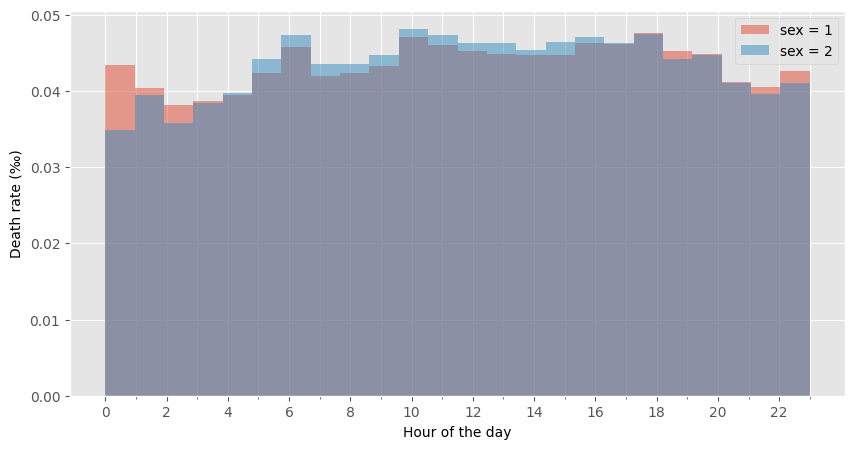

In [26]:
# histogram
plt.figure(figsize=(10, 5))
plt.grid(True, which="both")
plt.hist("hod", data=data.query("sex==1"), bins=24, density=True, alpha=.5, label="sex = 1")
plt.hist("hod", data=data.query("sex==2"), bins=24, density=True, alpha=.5, label="sex = 2")
plt.legend()
# axis
plt.xlabel("Hour of the day")
plt.xticks(np.arange(0, 24, 2))
plt.xticks(np.arange(0, 24, 1), minor=True)
plt.ylabel("Death rate (‰)")

Because a histogram cumulates data points into bins, it may also be difficult to inspect the distribution. Thus, to visualize the data more effectively, we can use a box plot. Hence, we need a better way to visualize this problem: a box plot. Instead of using `matplotlib.pyplot`, we will use `seaborn` to create a box plot. The `seaborn` library is built on top of `matplotlib` and provides a more convenient interface for data visualization.

([<matplotlib.axis.YTick at 0x2994a7e20>,
 [Text(0, 0.0001, ''),
  Text(0, 0.00030000000000000003, ''),
  Text(0, 0.0005, ''),
  Text(0, 0.0007, ''),
  Text(0, 0.0009000000000000001, ''),
  Text(0, 0.0011, ''),
  Text(0, 0.0013000000000000002, '')])

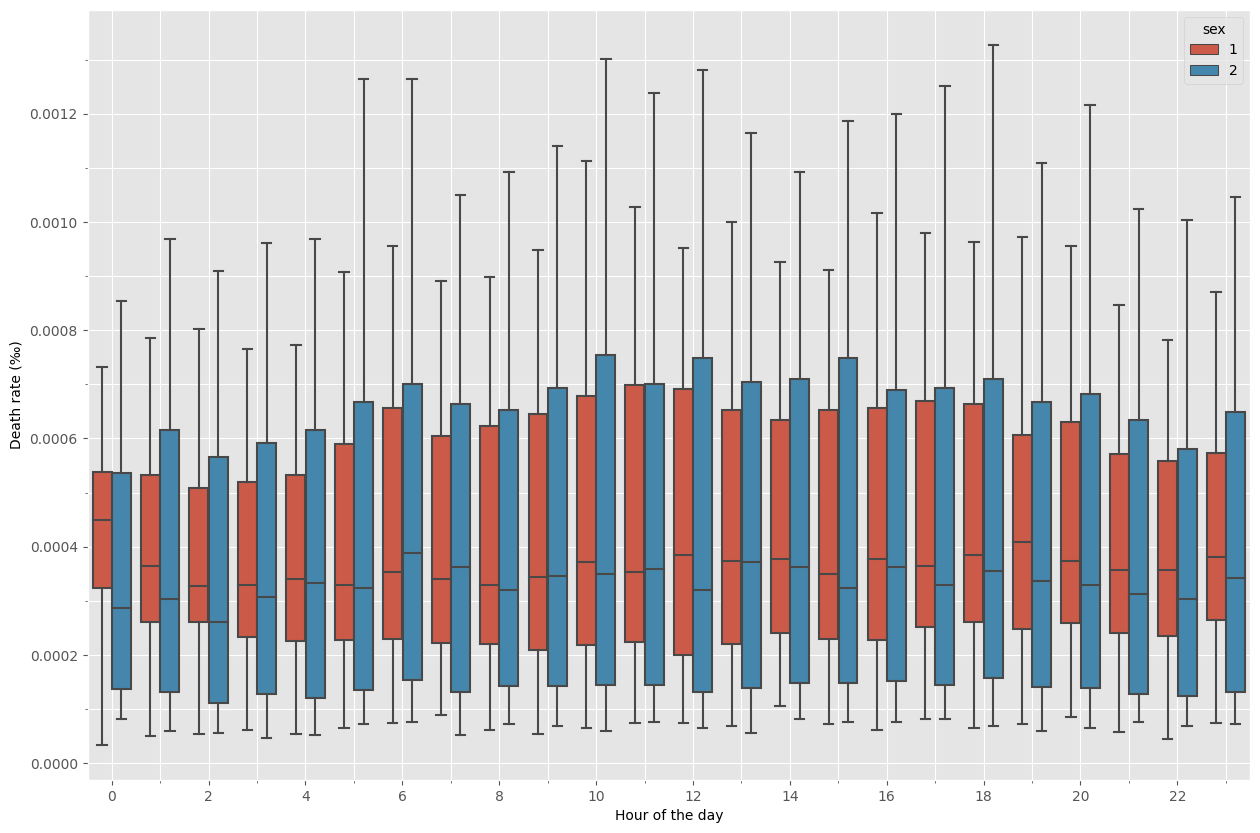

In [22]:
import seaborn as sns

# figure
plt.figure(figsize=(15, 10))
sns.boxplot(x="hod", y="rate", hue="sex", data=data_ct)
plt.grid(True, which="both")
# axis
plt.xlabel("Hour of the day")
plt.xticks(np.arange(0, 24, 2))
plt.xticks(np.arange(0, 24, 1), minor=True)
plt.ylabel("Death rate (‰)")
plt.yticks(np.arange(0, 0.0014, 0.0001), minor=True)

We can further decompose this figure into different age groups: 0-18, 19-35, 36-55, 56-75, and 76-100.

In [28]:
def cat_age(x):
    if x < 19:
        return "0 - 18"
    elif x < 36:
        return "19 - 35"
    elif x < 56:
        return "36 - 55"
    elif x < 76:
        return "56 - 75"
    else:
        return "76 - 100"

data_ct["age_cat"] = data_ct["age"].apply(cat_age)
data_ct

,sex,sum,age,hod,count,rate,per_mille,hod_cat,age_cat
0,1,294035,1,0,171,0.000582,0.581563,11 pm - 5 am,0 - 18
1,1,294035,1,1,152,0.000517,0.516945,11 pm - 5 am,0 - 18
2,1,294035,1,2,185,0.000629,0.629177,11 pm - 5 am,0 - 18
3,1,294035,1,3,190,0.000646,0.646182,11 pm - 5 am,0 - 18
4,1,294035,1,4,197,0.000670,0.669988,11 pm - 5 am,0 - 18
...,...,...,...,...,...,...,...,...,...
4747,2,234293,99,19,40,0.000171,0.170726,5 pm - 11 pm,76 - 100
4748,2,234293,99,20,40,0.000171,0.170726,5 pm - 11 pm,76 - 100
4749,2,234293,99,21,38,0.000162,0.162190,5 pm - 11 pm,76 - 100
4750,2,234293,99,22,35,0.000149,0.149386,5 pm - 11 pm,76 - 100


(0.0, 1.0, 0.0, 1.0)

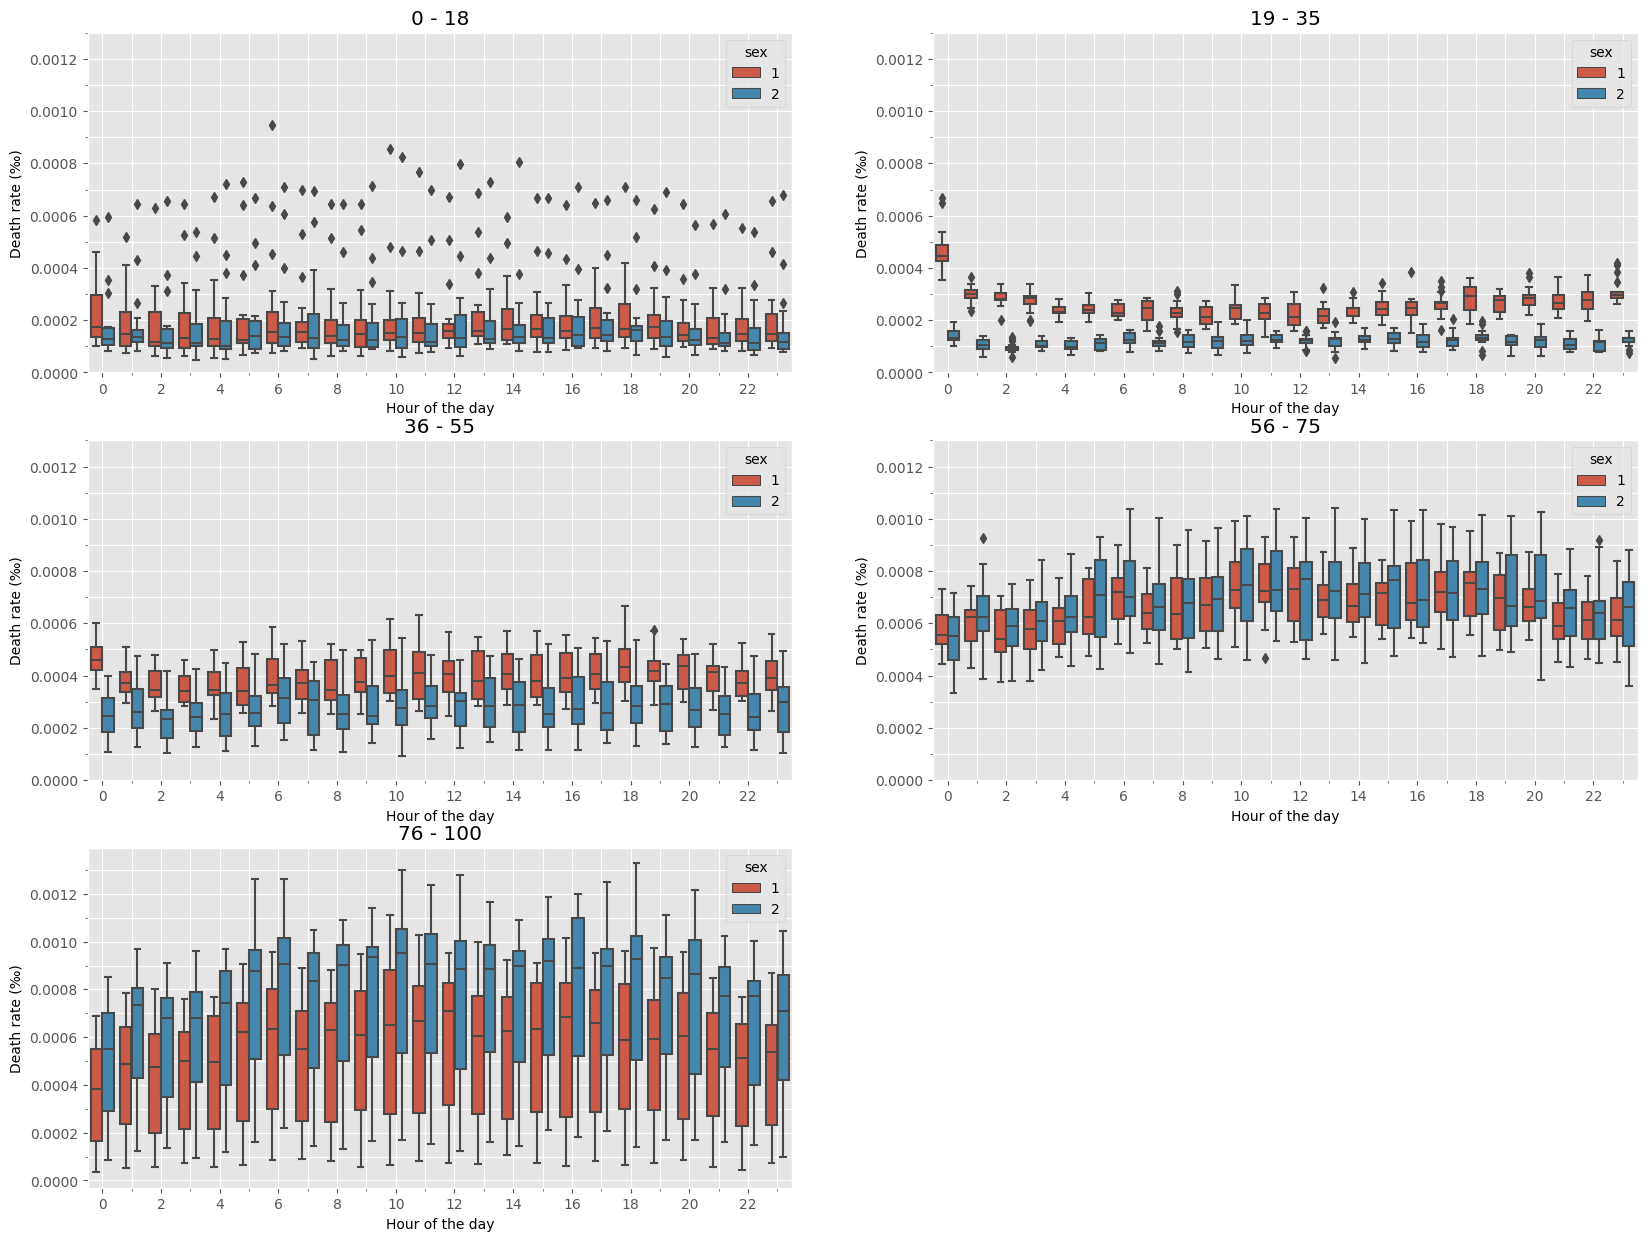

In [34]:
fig, axe = plt.subplots(3, 2, figsize=(20, 15))
axe = axe.flatten()

for i, age_cat in enumerate(["0 - 18", "19 - 35", "36 - 55", "56 - 75", "76 - 100"]):
    ax = axe[i]
    # data
    data_sub = data_ct.query("age_cat == @age_cat")
    sns.boxplot(data=data_sub, x='hod', y='rate', hue='sex', ax=ax)
    # subplot config
    ax.set_title(age_cat)
    ax.grid(True, which="both")
    # axis
    ax.set_xlabel("Hour of the day")
    ax.set_xticks(np.arange(0, 24, 2))
    ax.set_xticks(np.arange(0, 24, 1), minor=True)
    ax.set_ylabel("Death rate (‰)")
    ax.set_yticks(np.arange(0, 0.0014, 0.0001), minor=True)

# leave the last subplot empty
axe[-1].axis("off")
